In [47]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


In [8]:
# Displaying df with all columns available 
pd.set_option("display.max_columns",None,"display.max_rows",None)

In [9]:
data_df = pd.read_csv("../Data/Team_Stats/2000-2019_cleaned_data.csv")
data_df

,Year,Rk_Off,Team,Win,Loss,Games,PF_Off,Total Yds_Off,Plays_Off,Y/P_Off,TO_Off,FL_Off,1stD_Off,Cmp_Off,Pass Att_Off,Pass Yds_Off,Pass TD_Off,Int_Off,Pass NY/A_Off,Pass 1stD_Off,Rush Att_Off,Rush Yds_Off,Rush TD_Off,Rush Y/A_Off,Rush 1stD_Off,Pen_Off,Pen Yds_Off,1stPy_Off,Sc%_Off,TO%_Off,EXP_Off,Rk_Def,PF_Def,Total Yds_Def,Ply_Def,Y/P_Def,TO_Def,FL_Def,Total 1stD_Def,Cmp_Def,Pass Att_Def,Pass Yds_Def,Pass TD_Def,Int_Def,Pass NY/A_Def,Pass 1stD_Def,Rush Att_Def,Rush Yds_Def,Rush TD_Def,Rush Y/A_Def,Rush 1stD_Def,Pen_Def,Pen Yds_Def,1stPy_Def,Sc%_Def,TO%_Def,EXP_Def,Overall Production
0,2000,1,St. Louis Rams,10,6,16,540,7075,1014,7.0,35,12,380,380,587,5232,37,23,8.3,247,383,1843,26,4.8,112,111,942,21,46.8,16.7,49.41,31,471,5494,968,5.7,25,6,321,323,534,3797,32,19,6.5,195,383,1697,18,4.4,95,101,747,31,40.9,12.4,21.56,1581
1,2000,2,Denver Broncos,11,5,16,485,6554,1115,5.9,25,13,383,354,569,4243,28,12,7.1,223,516,2311,21,4.5,124,89,792,36,38.3,11.7,-40.21,23,369,5544,962,5.8,44,17,294,310,574,3946,26,27,6.4,189,344,1598,13,4.6,80,109,898,25,30.2,20.8,104.83,1010
2,2000,3,Oakland Raiders,12,4,16,479,5776,1023,5.6,20,9,337,284,475,3306,28,11,6.6,177,520,2470,23,4.8,128,118,940,32,39.2,10.6,11.03,9,299,5249,1014,5.2,37,16,320,359,588,3698,25,21,5.9,202,383,1551,8,4.0,85,117,912,33,26.9,18.7,185.58,527
3,2000,4,Indianapolis Colts,10,6,16,429,6141,1026,6.0,29,14,357,357,571,4282,33,15,7.2,213,435,1859,14,4.3,111,89,866,33,40.4,15.2,47.85,15,326,5357,1018,5.3,22,8,310,317,530,3422,22,14,6.0,177,446,1935,13,4.3,109,103,820,24,31.1,11.7,64.32,784
4,2000,5,Minnesota Vikings,11,5,16,397,5961,958,6.2,28,10,319,307,495,3832,33,18,7.2,193,428,2129,14,5.0,107,106,908,19,39.7,14.9,-60.12,24,371,5701,1011,5.6,18,10,344,369,584,3913,23,8,6.4,208,396,1788,17,4.5,110,104,747,26,38.2,9.4,2.03,260
5,2000,6,Tampa Bay Buccaneers,10,6,16,388,4649,961,4.8,24,11,275,237,433,2583,18,13,5.5,144,490,2066,18,4.2,111,82,702,20,32.7,10.2,-137.51,8,269,4800,1047,4.6,41,16,283,339,594,3152,15,25,4.9,180,398,1648,12,4.1,84,95,688,19,24.1,19.7,268.79,-151
6,2000,7,San Francisco 49ers,6,10,16,388,6040,1024,5.9,19,9,334,366,583,4239,32,10,7.0,211,416,1801,15,4.3,98,134,1135,25,34.3,10.5,9.23,28,422,5709,1031,5.5,21,8,347,320,558,3915,25,13,6.6,194,435,1794,22,4.1,110,102,857,43,39.9,10.9,11.43,331
7,2000,8,Jacksonville Jaguars,7,9,16,367,5690,1080,5.3,29,14,318,333,545,3658,22,15,6.1,193,481,2032,18,4.2,109,95,703,16,34.8,13.6,-104.56,16,327,4845,934,5.2,30,18,252,258,458,3160,23,12,6.3,144,436,1685,14,3.9,85,96,814,23,27.6,13.8,138.56,845
8,2000,9,Kansas City Chiefs,7,9,16,355,5614,999,5.6,26,11,321,342,582,4149,29,15,6.7,207,383,1465,12,3.8,84,118,848,30,30.5,13.2,-89.85,19,354,5280,1041,5.1,29,14,330,358,549,3471,25,15,5.8,201,441,1809,13,4.1,103,108,1020,26,30.3,14.4,112.92,334
9,2000,10,New Orleans Saints,10,6,16,354,5397,1041,5.2,26,11,312,298,497,3329,22,15,6.2,169,505,2068,14,4.1,117,124,1024,26,32.4,12.6,-126.04,10,305,4743,949,5.0,35,15,279,285,488,3071,17,20,5.5,159,395,1672,14,4.2,95,105,837,25,27.7,17.5,130.28,654


# EDA / Preprocessing

In [12]:
data_df.isna().sum()

Year                  0
Rk_Off                0
Team                  0
Win                   0
Loss                  0
Games                 0
PF_Off                0
Total Yds_Off         0
Plays_Off             0
Y/P_Off               0
TO_Off                0
FL_Off                0
1stD_Off              0
Cmp_Off               0
Pass Att_Off          0
Pass Yds_Off          0
Pass TD_Off           0
Int_Off               0
Pass NY/A_Off         0
Pass 1stD_Off         0
Rush Att_Off          0
Rush Yds_Off          0
Rush TD_Off           0
Rush Y/A_Off          0
Rush 1stD_Off         0
Pen_Off               0
Pen Yds_Off           0
1stPy_Off             0
Sc%_Off               0
TO%_Off               0
EXP_Off               0
Rk_Def                0
PF_Def                0
Total Yds_Def         0
Ply_Def               0
Y/P_Def               0
TO_Def                0
FL_Def                0
Total 1stD_Def        0
Cmp_Def               0
Pass Att_Def          0
Pass Yds_Def    

In [11]:
targets = data_df.loc[:,"Win"].values
targets

array([10, 11, 12, 10, 11, 10,  6,  7,  7, 10,  9, 11, 13, 12, 12, 11,  9,
        9,  6,  8,  7,  9,  5,  8,  5,  1,  4,  5,  3,  4,  3, 14,  6, 12,
       10, 12, 11, 13, 11, 11,  8, 13,  7,  7,  5,  9,  6, 10, 10,  9,  7,
        7,  6,  7,  5,  7,  2,  3,  8,  1,  5,  6,  8, 11,  9, 12,  9, 12,
        9, 10,  6,  9,  8,  9, 10, 11,  9,  7, 10, 12,  9,  8,  6, 10,  7,
        7,  7,  3,  4,  2,  5,  7,  5,  4, 13, 12, 12, 10, 12,  9, 10, 10,
        7, 10, 12, 14,  8,  8, 11,  4, 10,  7,  6,  5, 10,  5,  6,  7,  5,
        4,  5,  5,  5,  4,  6,  4, 12,  7, 12, 14, 10,  8,  9, 13, 10,  8,
       15,  9,  7,  8,  5, 11, 10,  5,  8,  9,  7,  6,  5,  6,  6,  6,  4,
        4,  9,  2,  6,  5, 13, 14, 11, 11,  9, 10, 13, 11, 11, 10,  6, 12,
       10,  8,  9,  9,  5,  6,  9, 11,  4,  4,  4,  5,  6,  2, 11,  5,  4,
        4,  3,  6, 14, 13, 12,  9, 10, 10, 12,  8,  8,  8,  8, 13,  8,  9,
        9,  8,  9, 10,  5,  5,  3,  8,  7,  7,  7,  6,  8,  6,  6,  4,  4,
        2, 16, 13, 13, 13

In [59]:
# inputs = data_df[["Rk_Off", "Total Yds_Off", "Plays_Off","Y/P_Off",
#  "1stD_Off","Pass Att_Off","Pass TD_Off", "Pass NY/A_Off",
# "Pen Yds_Off","Total Yds_Def", "Ply_Def","Y/P_Def",
# "FL_Def","Total 1stD_Def","Pass Yds_Def","Pass TD_Def",
# "Rush TD_Def"]]
inputs = data_df.drop(columns=["Team" , "Year", "Win", "Loss", "Games"])
feature_names = inputs.columns
inputs


,Rk_Off,PF_Off,Total Yds_Off,Plays_Off,Y/P_Off,TO_Off,FL_Off,1stD_Off,Cmp_Off,Pass Att_Off,Pass Yds_Off,Pass TD_Off,Int_Off,Pass NY/A_Off,Pass 1stD_Off,Rush Att_Off,Rush Yds_Off,Rush TD_Off,Rush Y/A_Off,Rush 1stD_Off,Pen_Off,Pen Yds_Off,1stPy_Off,Sc%_Off,TO%_Off,EXP_Off,Rk_Def,PF_Def,Total Yds_Def,Ply_Def,Y/P_Def,TO_Def,FL_Def,Total 1stD_Def,Cmp_Def,Pass Att_Def,Pass Yds_Def,Pass TD_Def,Int_Def,Pass NY/A_Def,Pass 1stD_Def,Rush Att_Def,Rush Yds_Def,Rush TD_Def,Rush Y/A_Def,Rush 1stD_Def,Pen_Def,Pen Yds_Def,1stPy_Def,Sc%_Def,TO%_Def,EXP_Def,Overall Production
0,1,540,7075,1014,7.0,35,12,380,380,587,5232,37,23,8.3,247,383,1843,26,4.8,112,111,942,21,46.8,16.7,49.41,31,471,5494,968,5.7,25,6,321,323,534,3797,32,19,6.5,195,383,1697,18,4.4,95,101,747,31,40.9,12.4,21.56,1581
1,2,485,6554,1115,5.9,25,13,383,354,569,4243,28,12,7.1,223,516,2311,21,4.5,124,89,792,36,38.3,11.7,-40.21,23,369,5544,962,5.8,44,17,294,310,574,3946,26,27,6.4,189,344,1598,13,4.6,80,109,898,25,30.2,20.8,104.83,1010
2,3,479,5776,1023,5.6,20,9,337,284,475,3306,28,11,6.6,177,520,2470,23,4.8,128,118,940,32,39.2,10.6,11.03,9,299,5249,1014,5.2,37,16,320,359,588,3698,25,21,5.9,202,383,1551,8,4.0,85,117,912,33,26.9,18.7,185.58,527
3,4,429,6141,1026,6.0,29,14,357,357,571,4282,33,15,7.2,213,435,1859,14,4.3,111,89,866,33,40.4,15.2,47.85,15,326,5357,1018,5.3,22,8,310,317,530,3422,22,14,6.0,177,446,1935,13,4.3,109,103,820,24,31.1,11.7,64.32,784
4,5,397,5961,958,6.2,28,10,319,307,495,3832,33,18,7.2,193,428,2129,14,5.0,107,106,908,19,39.7,14.9,-60.12,24,371,5701,1011,5.6,18,10,344,369,584,3913,23,8,6.4,208,396,1788,17,4.5,110,104,747,26,38.2,9.4,2.03,260
5,6,388,4649,961,4.8,24,11,275,237,433,2583,18,13,5.5,144,490,2066,18,4.2,111,82,702,20,32.7,10.2,-137.51,8,269,4800,1047,4.6,41,16,283,339,594,3152,15,25,4.9,180,398,1648,12,4.1,84,95,688,19,24.1,19.7,268.79,-151
6,7,388,6040,1024,5.9,19,9,334,366,583,4239,32,10,7.0,211,416,1801,15,4.3,98,134,1135,25,34.3,10.5,9.23,28,422,5709,1031,5.5,21,8,347,320,558,3915,25,13,6.6,194,435,1794,22,4.1,110,102,857,43,39.9,10.9,11.43,331
7,8,367,5690,1080,5.3,29,14,318,333,545,3658,22,15,6.1,193,481,2032,18,4.2,109,95,703,16,34.8,13.6,-104.56,16,327,4845,934,5.2,30,18,252,258,458,3160,23,12,6.3,144,436,1685,14,3.9,85,96,814,23,27.6,13.8,138.56,845
8,9,355,5614,999,5.6,26,11,321,342,582,4149,29,15,6.7,207,383,1465,12,3.8,84,118,848,30,30.5,13.2,-89.85,19,354,5280,1041,5.1,29,14,330,358,549,3471,25,15,5.8,201,441,1809,13,4.1,103,108,1020,26,30.3,14.4,112.92,334
9,10,354,5397,1041,5.2,26,11,312,298,497,3329,22,15,6.2,169,505,2068,14,4.1,117,124,1024,26,32.4,12.6,-126.04,10,305,4743,949,5.0,35,15,279,285,488,3071,17,20,5.5,159,395,1672,14,4.2,95,105,837,25,27.7,17.5,130.28,654


In [56]:
sc = StandardScaler()
sc.fit_transform(inputs)

array([[-1.67829457,  2.65921061,  2.70292403, ..., -0.21497786,
        -0.44123929,  2.01823875],
       [-1.56967701,  1.88828801,  1.88126257, ...,  2.36360172,
         0.3808642 ,  1.28932321],
       [-1.46105944,  1.80418736,  0.65429019, ...,  1.71895682,
         1.17808838,  0.67274492],
       ...,
       [ 1.47161475, -0.99916754, -0.30300061, ..., -1.3200834 ,
        -1.96381405, -1.44251437],
       [ 1.58023232, -1.04121786, -1.56624596, ..., -0.92101751,
        -0.65468804, -1.02380281],
       [ 1.68884988, -1.1813856 , -1.52366465, ..., -0.27637261,
        -1.99511065, -2.25568284]])

In [57]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets)

# Linear Regression

In [58]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)

0.8398069090494625

# Random Forest 

In [52]:
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x_train,y_train)
# regressor.score(x_test,y_test)
sorted(zip(regressor.feature_importances_ , feature_names), reverse=True)

array([0.55645004, 0.02007184, 0.01579298, 0.0081139 , 0.01401066,
       0.03249362, 0.01217525, 0.03036411, 0.02329482, 0.04558085,
       0.01724466, 0.02248155, 0.00950341, 0.0284852 , 0.01168671,
       0.06652719, 0.08572321])

Text(0.5, 1.0, 'Multi-Collinearity of Football')

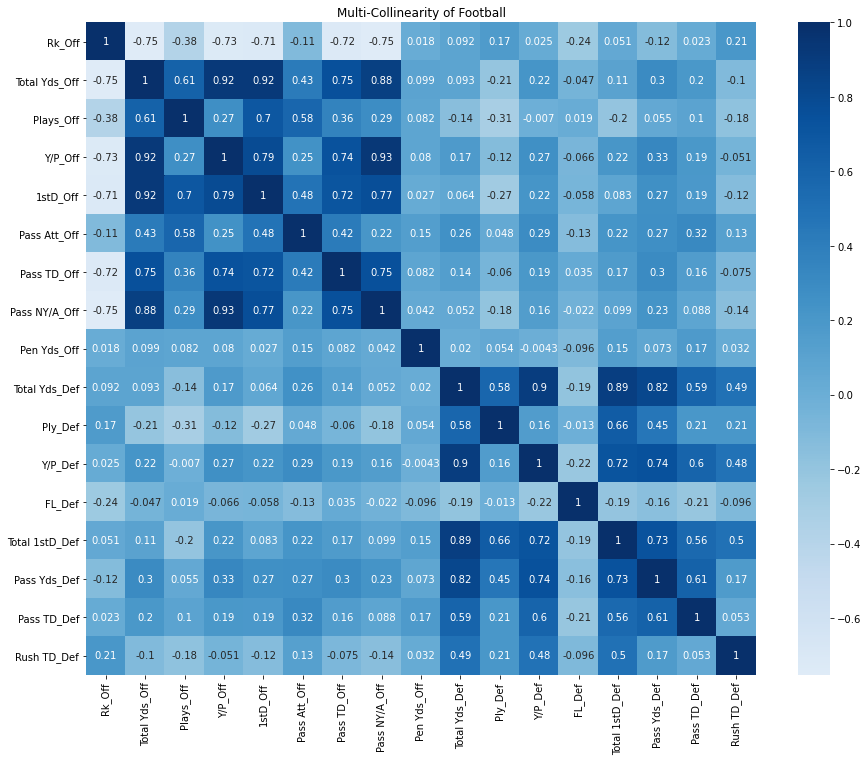

In [46]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(inputs.corr(), center=0, cmap="Blues",annot=True)
ax.set_title("Multi-Collinearity of Football Stats")